# <center><b><h1>NeuralNetwork (First Run)</h1></b></center>

In [1]:
import itertools
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from math import cos, sin, atan
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.externals import joblib
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,confusion_matrix, precision_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import spearmanr, pearsonr

## 1. Prepare the data

In [2]:
df_X_train = pd.read_csv("../../../Data/all_patients/X_train.csv", index_col=0)
df_X_train.shape

(483, 16)

In [3]:
df_y_train = pd.read_csv("../../../Data/all_patients/y_train.csv", index_col=0)
df_y_train.shape

(483, 1)

In [4]:
df_X_val = pd.read_csv("../../../Data/all_patients/X_val.csv", index_col=0)
df_X_val.shape

(30777, 16)

In [5]:
df_y_val = pd.read_csv("../../../Data/all_patients/y_val.csv", index_col=0)
df_y_val.shape

(30777, 1)

In [6]:
neural_network_name = 'NeuralNetwork - All_Patients - First Run - Base Ratio 05'

## 2. Finding the best number of layers (between 1 and 2) and the best number of neurons

### 2.1 AUC based

In [7]:
max_n_neurons = df_X_train.shape[1] * 2 + 1
max_n_randomstate = 100

In [8]:
best_score_sl = actual_score = 0
best_i_sl = 0
for i in range(1,max_n_neurons,1):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=200000,verbose=False)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

I:  1 Best_I:  1 Best_Score:  0.526345403562942 Actual_Score:  0.526345403562942
I:  2 Best_I:  2 Best_Score:  0.53777371923347 Actual_Score:  0.53777371923347
I:  3 Best_I:  2 Best_Score:  0.53777371923347 Actual_Score:  0.5157032532423145
I:  4 Best_I:  4 Best_Score:  0.5725861672099587 Actual_Score:  0.5725861672099587
I:  5 Best_I:  5 Best_Score:  0.5736019335308096 Actual_Score:  0.5736019335308096
I:  6 Best_I:  5 Best_Score:  0.5736019335308096 Actual_Score:  0.5469914716317829
I:  7 Best_I:  5 Best_Score:  0.5736019335308096 Actual_Score:  0.5140602984463861
I:  8 Best_I:  5 Best_Score:  0.5736019335308096 Actual_Score:  0.5416827484224379
I:  9 Best_I:  5 Best_Score:  0.5736019335308096 Actual_Score:  0.5046626435151386
I:  10 Best_I:  5 Best_Score:  0.5736019335308096 Actual_Score:  0.5421375908522323
I:  11 Best_I:  5 Best_Score:  0.5736019335308096 Actual_Score:  0.5631655521816161
I:  12 Best_I:  5 Best_Score:  0.5736019335308096 Actual_Score:  0.530221009825759
I:  13 Bes

In [9]:
best_score_twol = actual_score = 0
best_i_twol = best_j_twol = 0
for i in range(1,max_n_neurons,1):
    for j in range(1,max_n_neurons,1):
        mlp = MLPClassifier(hidden_layer_sizes=(i,j,), max_iter=200000,verbose=False)
        mlp.fit(df_X_train,df_y_train['Class'].values)
        predictions = mlp.predict(df_X_val.values)
        fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
        actual_score = auc(fpr, tpr)
        if actual_score > best_score_twol:
            best_score_twol = actual_score
            best_i_twol = i
            best_j_twol = j
        print("I,J: ", i,"-",j)
    print("Best_I: ", best_i_twol,"Best_J: ", best_j_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_twol,"Best_I: ",best_j_twol,"Best_Score: ", best_score_twol)

I,J:  1 - 1
I,J:  1 - 2
I,J:  1 - 3
I,J:  1 - 4
I,J:  1 - 5
I,J:  1 - 6
I,J:  1 - 7
I,J:  1 - 8
I,J:  1 - 9
I,J:  1 - 10
I,J:  1 - 11
I,J:  1 - 12
I,J:  1 - 13
I,J:  1 - 14
I,J:  1 - 15
I,J:  1 - 16
I,J:  1 - 17
I,J:  1 - 18
I,J:  1 - 19
I,J:  1 - 20
I,J:  1 - 21
I,J:  1 - 22
I,J:  1 - 23
I,J:  1 - 24
I,J:  1 - 25
I,J:  1 - 26
I,J:  1 - 27
I,J:  1 - 28
I,J:  1 - 29
I,J:  1 - 30
I,J:  1 - 31
I,J:  1 - 32
Best_I:  1 Best_J:  32 Best_Score:  0.5430824424428148 Actual_Score:  0.5430824424428148
I,J:  2 - 1
I,J:  2 - 2
I,J:  2 - 3
I,J:  2 - 4
I,J:  2 - 5
I,J:  2 - 6
I,J:  2 - 7
I,J:  2 - 8
I,J:  2 - 9
I,J:  2 - 10
I,J:  2 - 11
I,J:  2 - 12
I,J:  2 - 13
I,J:  2 - 14
I,J:  2 - 15
I,J:  2 - 16
I,J:  2 - 17
I,J:  2 - 18
I,J:  2 - 19
I,J:  2 - 20
I,J:  2 - 21
I,J:  2 - 22
I,J:  2 - 23
I,J:  2 - 24
I,J:  2 - 25
I,J:  2 - 26
I,J:  2 - 27
I,J:  2 - 28
I,J:  2 - 29
I,J:  2 - 30
I,J:  2 - 31
I,J:  2 - 32
Best_I:  2 Best_J:  7 Best_Score:  0.5698422902900296 Actual_Score:  0.5251831576353077
I,J:  3 -

I,J:  17 - 4
I,J:  17 - 5
I,J:  17 - 6
I,J:  17 - 7
I,J:  17 - 8
I,J:  17 - 9
I,J:  17 - 10
I,J:  17 - 11
I,J:  17 - 12
I,J:  17 - 13
I,J:  17 - 14
I,J:  17 - 15
I,J:  17 - 16
I,J:  17 - 17
I,J:  17 - 18
I,J:  17 - 19
I,J:  17 - 20
I,J:  17 - 21
I,J:  17 - 22
I,J:  17 - 23
I,J:  17 - 24
I,J:  17 - 25
I,J:  17 - 26
I,J:  17 - 27
I,J:  17 - 28
I,J:  17 - 29
I,J:  17 - 30
I,J:  17 - 31
I,J:  17 - 32
Best_I:  12 Best_J:  14 Best_Score:  0.6227935056057512 Actual_Score:  0.5206989634824015
I,J:  18 - 1
I,J:  18 - 2
I,J:  18 - 3
I,J:  18 - 4
I,J:  18 - 5
I,J:  18 - 6
I,J:  18 - 7
I,J:  18 - 8
I,J:  18 - 9
I,J:  18 - 10
I,J:  18 - 11
I,J:  18 - 12
I,J:  18 - 13
I,J:  18 - 14
I,J:  18 - 15
I,J:  18 - 16
I,J:  18 - 17
I,J:  18 - 18
I,J:  18 - 19
I,J:  18 - 20
I,J:  18 - 21
I,J:  18 - 22
I,J:  18 - 23
I,J:  18 - 24
I,J:  18 - 25
I,J:  18 - 26
I,J:  18 - 27
I,J:  18 - 28
I,J:  18 - 29
I,J:  18 - 30
I,J:  18 - 31
I,J:  18 - 32
Best_I:  12 Best_J:  14 Best_Score:  0.6227935056057512 Actual_Score:  

I,J:  32 - 24
I,J:  32 - 25
I,J:  32 - 26
I,J:  32 - 27
I,J:  32 - 28
I,J:  32 - 29
I,J:  32 - 30
I,J:  32 - 31
I,J:  32 - 32
Best_I:  12 Best_J:  14 Best_Score:  0.6227935056057512 Actual_Score:  0.5395297307100309
Best_I:  12 Best_I:  14 Best_Score:  0.6227935056057512


## 3 Find the best random state for both single layer and two layers

In [10]:
best_score_sl = actual_score = 0
best_random_state_sl = 0
for i in range(1,max_n_randomstate,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_random_state_sl = i
    print("I: ", i, "Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl)

I:  1 Best_Random_State:  1 Best_Score:  0.5174993722302567 Actual_Score:  0.5174993722302567
I:  2 Best_Random_State:  2 Best_Score:  0.5630115160871809 Actual_Score:  0.5630115160871809
I:  3 Best_Random_State:  2 Best_Score:  0.5630115160871809 Actual_Score:  0.5366844224750869
I:  4 Best_Random_State:  2 Best_Score:  0.5630115160871809 Actual_Score:  0.5002865652624775
I:  5 Best_Random_State:  2 Best_Score:  0.5630115160871809 Actual_Score:  0.5394971796863012
I:  6 Best_Random_State:  2 Best_Score:  0.5630115160871809 Actual_Score:  0.5514625872483689
I:  7 Best_Random_State:  2 Best_Score:  0.5630115160871809 Actual_Score:  0.4754605969857752
I:  8 Best_Random_State:  2 Best_Score:  0.5630115160871809 Actual_Score:  0.5366977916455473
I:  9 Best_Random_State:  2 Best_Score:  0.5630115160871809 Actual_Score:  0.5499911065953024
I:  10 Best_Random_State:  2 Best_Score:  0.5630115160871809 Actual_Score:  0.5445129436820788
I:  11 Best_Random_State:  2 Best_Score:  0.563011516087180

I:  88 Best_Random_State:  74 Best_Score:  0.5820692685784968 Actual_Score:  0.5108656479746287
I:  89 Best_Random_State:  74 Best_Score:  0.5820692685784968 Actual_Score:  0.5065430464038094
I:  90 Best_Random_State:  74 Best_Score:  0.5820692685784968 Actual_Score:  0.524181923021479
I:  91 Best_Random_State:  74 Best_Score:  0.5820692685784968 Actual_Score:  0.5811453426460264
I:  92 Best_Random_State:  92 Best_Score:  0.5871605974507899 Actual_Score:  0.5871605974507899
I:  93 Best_Random_State:  92 Best_Score:  0.5871605974507899 Actual_Score:  0.5178574334912833
I:  94 Best_Random_State:  92 Best_Score:  0.5871605974507899 Actual_Score:  0.5547014141094737
I:  95 Best_Random_State:  92 Best_Score:  0.5871605974507899 Actual_Score:  0.5269228936000038
I:  96 Best_Random_State:  92 Best_Score:  0.5871605974507899 Actual_Score:  0.5481356982427097
I:  97 Best_Random_State:  92 Best_Score:  0.5871605974507899 Actual_Score:  0.5751300878412626
I:  98 Best_Random_State:  92 Best_Score:

In [11]:
best_score_twol = actual_score = 0
best_random_state_twol = 0
for i in range(1,max_n_randomstate,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_twol:
        best_score_twol = actual_score
        best_random_state_twol = i
    print("I: ", i, "Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol)

I:  1 Best_Random_State:  1 Best_Score:  0.505192178919027 Actual_Score:  0.505192178919027
I:  2 Best_Random_State:  1 Best_Score:  0.505192178919027 Actual_Score:  0.49100661715810956
I:  3 Best_Random_State:  3 Best_Score:  0.5181111570958907 Actual_Score:  0.5181111570958907
I:  4 Best_Random_State:  4 Best_Score:  0.5754192688110041 Actual_Score:  0.5754192688110041
I:  5 Best_Random_State:  4 Best_Score:  0.5754192688110041 Actual_Score:  0.5151719740335834
I:  6 Best_Random_State:  4 Best_Score:  0.5754192688110041 Actual_Score:  0.5223753412044809
I:  7 Best_Random_State:  4 Best_Score:  0.5754192688110041 Actual_Score:  0.5137722800132065
I:  8 Best_Random_State:  4 Best_Score:  0.5754192688110041 Actual_Score:  0.5271699326193809
I:  9 Best_Random_State:  4 Best_Score:  0.5754192688110041 Actual_Score:  0.5527971792212865
I:  10 Best_Random_State:  4 Best_Score:  0.5754192688110041 Actual_Score:  0.5541901886564333
I:  11 Best_Random_State:  4 Best_Score:  0.5754192688110041 

I:  88 Best_Random_State:  73 Best_Score:  0.595984831222942 Actual_Score:  0.5404766167395965
I:  89 Best_Random_State:  73 Best_Score:  0.595984831222942 Actual_Score:  0.576818962831381
I:  90 Best_Random_State:  73 Best_Score:  0.595984831222942 Actual_Score:  0.5175740652043507
I:  91 Best_Random_State:  73 Best_Score:  0.595984831222942 Actual_Score:  0.511598046008547
I:  92 Best_Random_State:  73 Best_Score:  0.595984831222942 Actual_Score:  0.5498187605500193
I:  93 Best_Random_State:  73 Best_Score:  0.595984831222942 Actual_Score:  0.5462314633545224
I:  94 Best_Random_State:  73 Best_Score:  0.595984831222942 Actual_Score:  0.48768350639627617
I:  95 Best_Random_State:  73 Best_Score:  0.595984831222942 Actual_Score:  0.5071222802457137
I:  96 Best_Random_State:  73 Best_Score:  0.595984831222942 Actual_Score:  0.5933807493245663
I:  97 Best_Random_State:  73 Best_Score:  0.595984831222942 Actual_Score:  0.5371822787576669
I:  98 Best_Random_State:  73 Best_Score:  0.595984

## 4. Compute metrics on the best architecture

In [12]:
if (best_score_sl > 0.5) and (best_score_sl > best_score_twol):
    best_architecture = "One Layer"
    best_neurons = [best_i_sl]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=best_random_state_sl)
    mlp.fit(df_X_train,df_y_train['Class'].values)
elif best_score_twol > 0.5:
    best_architecture = "Two Layers"
    best_neurons = [best_i_twol, best_j_twol]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=best_random_state_twol)
    mlp.fit(df_X_train,df_y_train['Class'].values)
else:
    print("The auc value is below the threshold of 0.5 and it means that there aren't good NN with 1 or 2 hidden layers architecture")

predictions = mlp.predict(df_X_val.values)
print("The best architecture is : ", best_architecture)
layer = 0
for neuron in best_neurons:
    layer += 1
    print("For the hidden layer ", layer, " the best number of neurons is : ", neuron)

The best architecture is :  Two Layers
For the hidden layer  1  the best number of neurons is :  12
For the hidden layer  2  the best number of neurons is :  14


### 4.1 Confusion Matrix and Classification Report

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[21258  9463]
 [   28    28]]
Normalized confusion matrix
[[0.69 0.31]
 [0.5  0.5 ]]


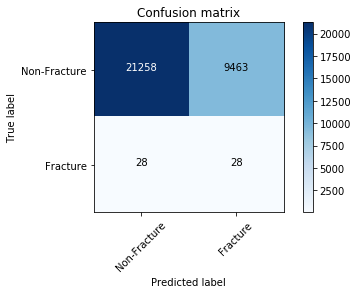

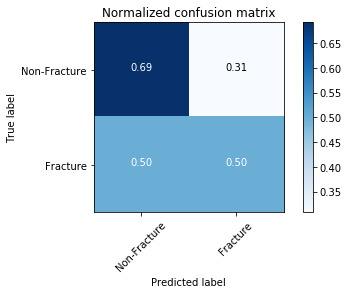

In [14]:
# Compute confusion matrix
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
tn, fp, fn, tp = conf_mat.ravel()

np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['Non-Fracture', "Fracture"],
                      title='Confusion matrix')
plt.savefig(neural_network_name+'_confusion_matrix.png', bbox_inches="tight")

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['Non-Fracture', "Fracture"], normalize=True,
                      title='Normalized confusion matrix')
plt.savefig(neural_network_name+'_confusion_matrix_normalized.png', bbox_inches="tight")
plt.show()

In [15]:
print(classification_report(df_y_val['Class'].values,predictions,target_names=['Non-Fracture','Fracture']))

              precision    recall  f1-score   support

Non-Fracture       1.00      0.69      0.82     30721
    Fracture       0.00      0.50      0.01        56

   micro avg       0.69      0.69      0.69     30777
   macro avg       0.50      0.60      0.41     30777
weighted avg       1.00      0.69      0.82     30777



### 4.2 Accuracy

In [16]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.691620365857621


### 4.3 Recall (or Sensitivity)

In [17]:
recall = tp/(tp+fn)
print("Recall : ", recall)

Recall :  0.5


### 4.4 Error

In [18]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.30837963414237907


### 4.5 Specificity

In [19]:
specificity = tn / (tn+fp)

print(specificity)

0.6919696624458839


### 4.6 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [20]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
print(1 - specificity)

0.3080303375541161
0.30803033755411613


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [21]:
precision = tp / float(tp+fp)

print(precision)

0.002950163312611948


## 5. Metrics visualization

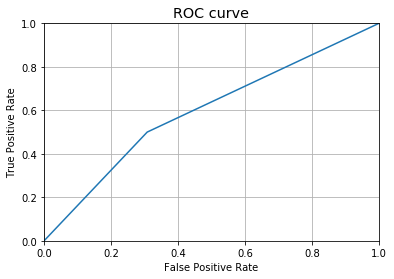

In [22]:
fpr, tpr, thresholds = roc_curve(df_y_val, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 6. Neural Network Visualization

In [23]:
class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = plt.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        plt.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            plt.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            plt.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            plt.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        plt.figure(figsize=(38,8), dpi=300)
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        plt.axis('scaled')
        plt.axis('off')
        plt.title( 'Neural Network architecture', fontsize=15 )
        plt.savefig(neural_network_name+'_network.png', bbox_inches="tight")
        plt.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

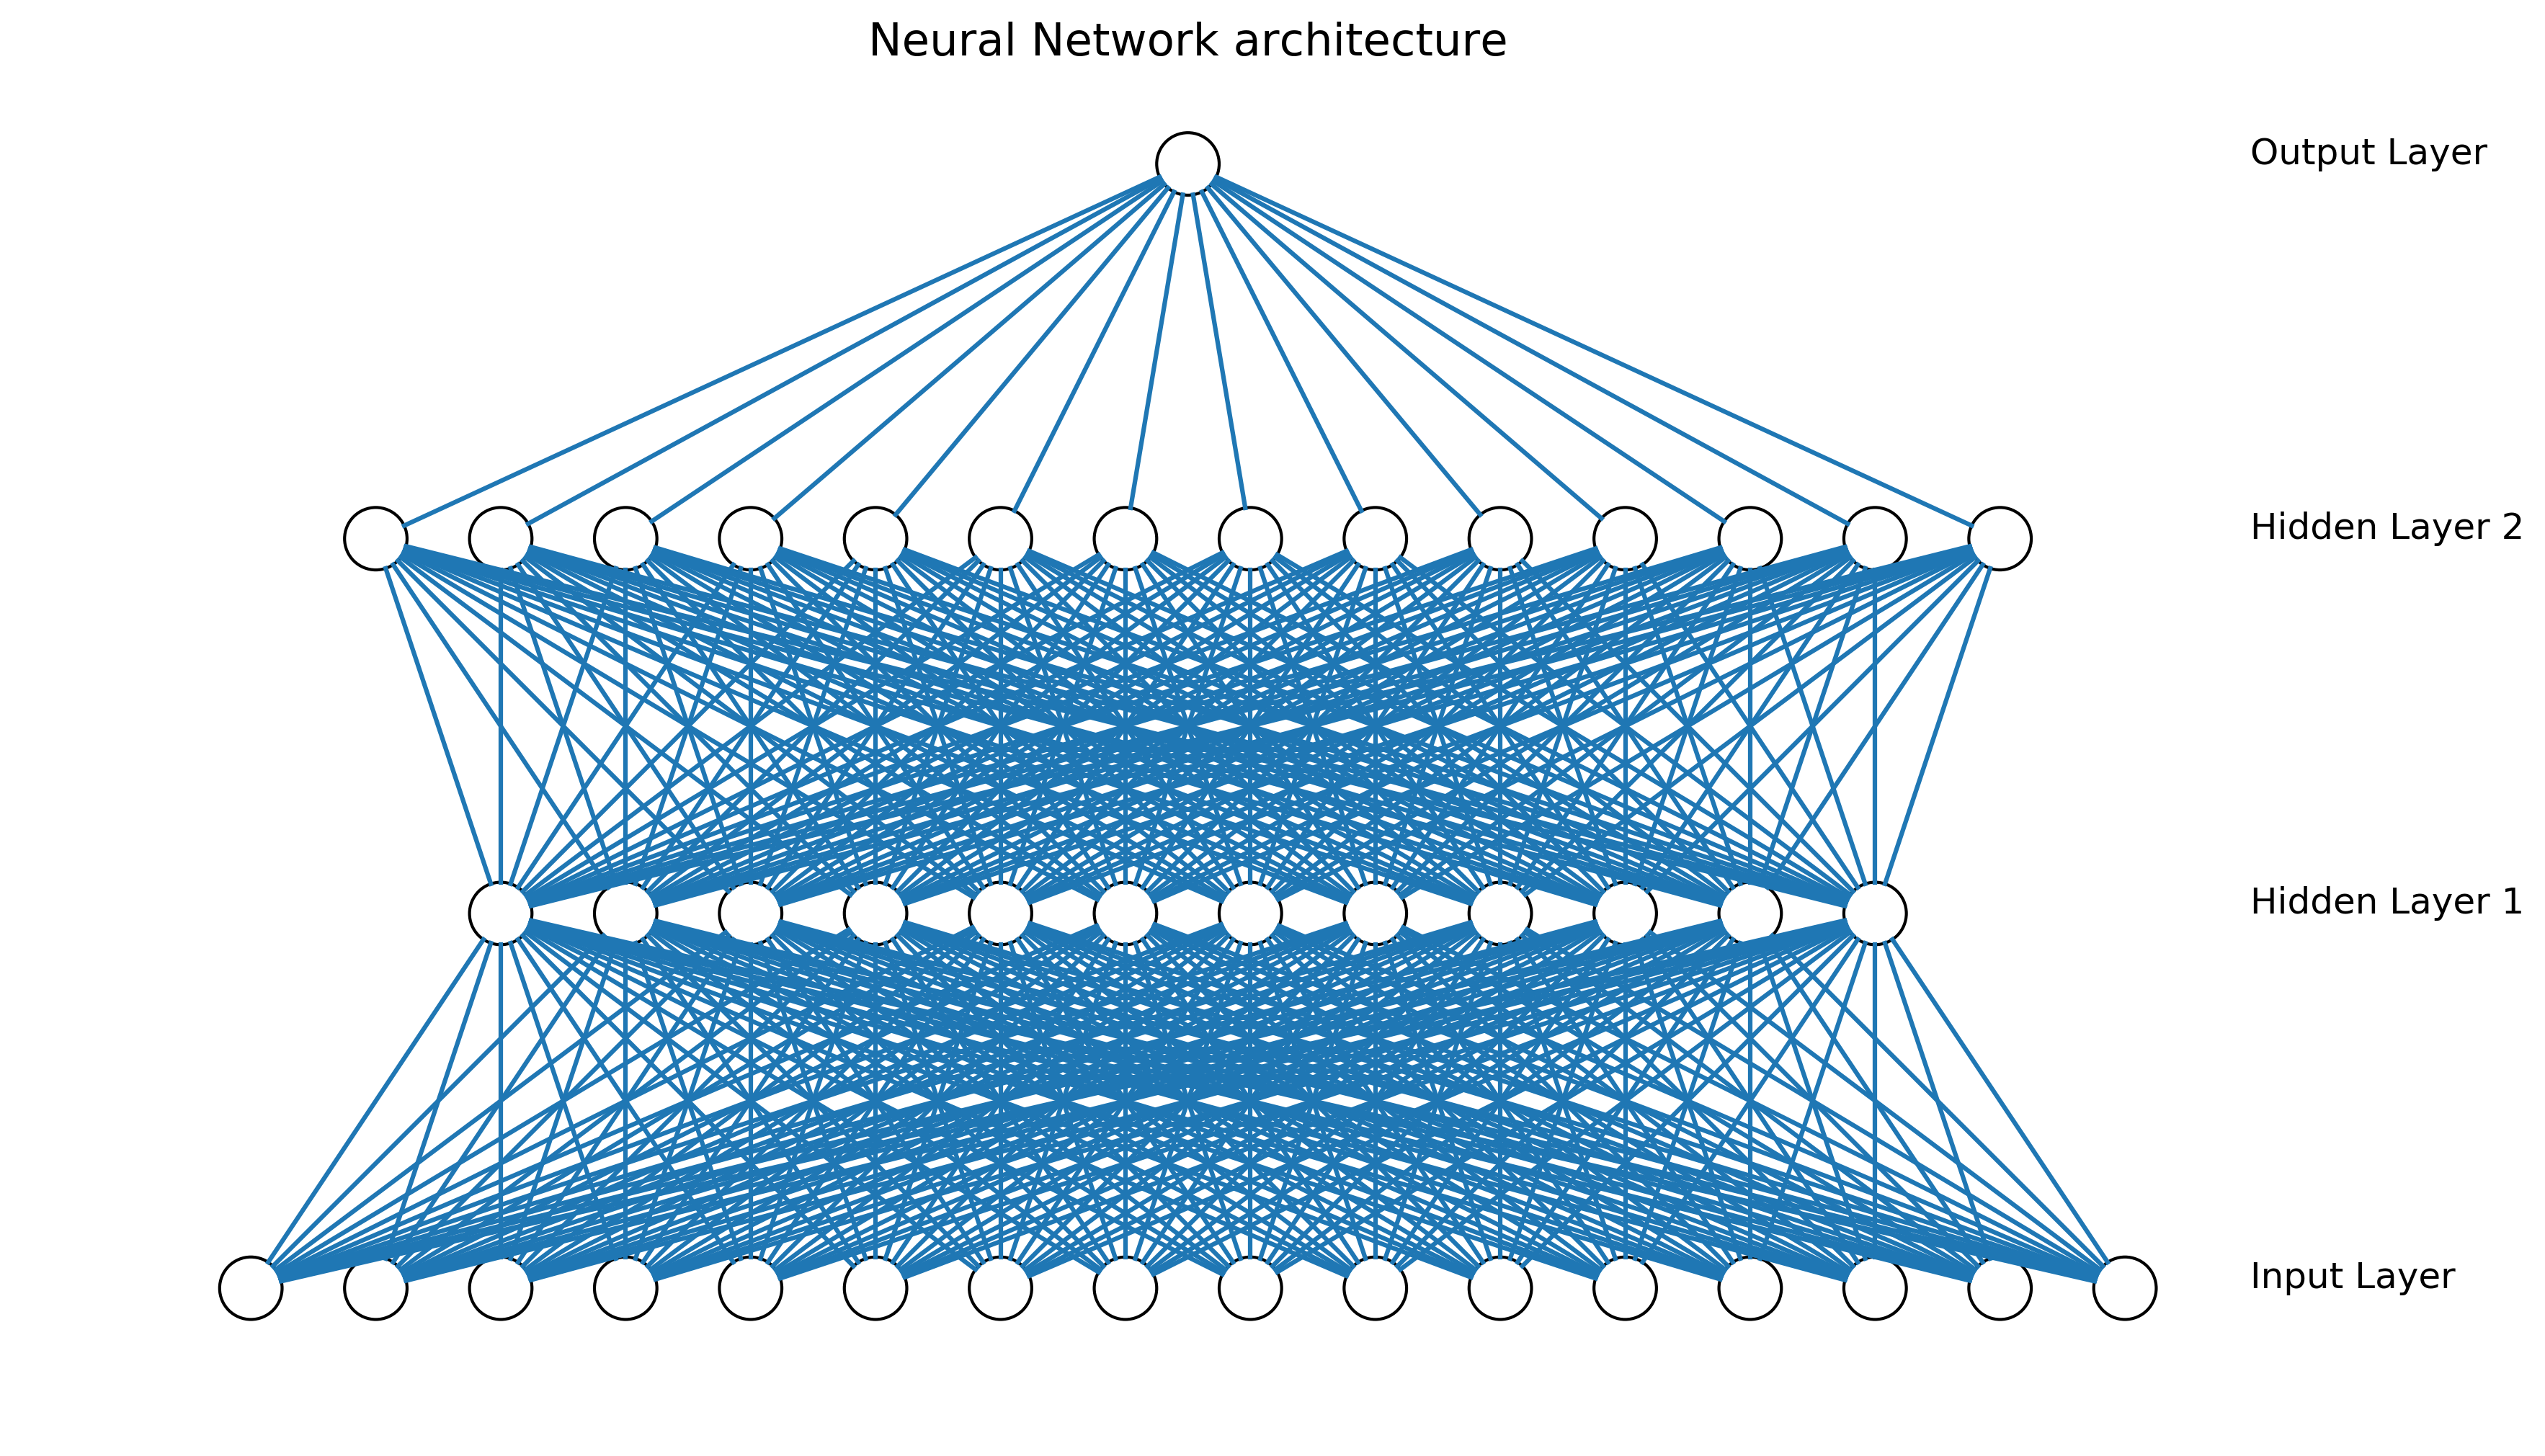

In [24]:
n_input = df_X_train.shape[1]
n_output = 1
if best_score_sl > best_score_twol:
    nn_structure = [n_input, best_i_sl, n_output]
else:
    nn_structure = [n_input, best_i_twol, best_j_twol, n_output]    
neural_network = DrawNN( nn_structure )
neural_network.draw()

## 7. Creation new dataframe

In [25]:
mod_df = pd.DataFrame(df_X_val)

In [26]:
mod_df.head()

,sex,age,weight,height,HIPX,menopause,HRT,smoking,ReumatoidArthritis,SecondaryOsteoporsis,Alcohol,VitaminD,calcium,dose_walk,dose_moderate,dose_vigorous
149978,-1.029482,-0.964756,-0.987940,-0.459541,-0.037838,-0.695973,-0.423252,0.760768,-0.08895,-0.134216,-0.788571,0.365784,0.481256,-0.660037,-0.611945,1.127242
43265,0.971362,0.028478,0.727100,0.737192,-0.037838,-0.695973,-0.423252,-0.808640,-0.08895,-0.134216,1.063532,-0.950718,-0.717017,-0.726827,-0.313105,-0.477234
116861,-1.029482,0.897557,-0.184613,-1.003510,-0.037838,1.436838,-0.423252,-0.808640,-0.08895,-0.134216,-0.788571,-0.359561,-1.365197,-0.493062,-0.387815,-0.353813
46479,0.971362,1.642483,-0.273871,-0.241953,-0.037838,-0.695973,-0.423252,-0.808640,-0.08895,-0.134216,1.891623,-0.341428,-0.490382,1.143293,-0.163685,-0.168681
115581,0.971362,-1.709681,0.880115,0.737192,-0.037838,-0.695973,-0.423252,-0.808640,-0.08895,-0.134216,-0.788571,0.213462,-1.563266,0.208233,-0.163685,-0.168681


In [27]:
mod_df['real_class'] = df_y_val
mod_df['predicted_class'] = predictions

In [28]:
mod_df.head()

,sex,age,weight,height,HIPX,menopause,HRT,smoking,ReumatoidArthritis,SecondaryOsteoporsis,Alcohol,VitaminD,calcium,dose_walk,dose_moderate,dose_vigorous,real_class,predicted_class
149978,-1.029482,-0.964756,-0.987940,-0.459541,-0.037838,-0.695973,-0.423252,0.760768,-0.08895,-0.134216,-0.788571,0.365784,0.481256,-0.660037,-0.611945,1.127242,0,1
43265,0.971362,0.028478,0.727100,0.737192,-0.037838,-0.695973,-0.423252,-0.808640,-0.08895,-0.134216,1.063532,-0.950718,-0.717017,-0.726827,-0.313105,-0.477234,0,0
116861,-1.029482,0.897557,-0.184613,-1.003510,-0.037838,1.436838,-0.423252,-0.808640,-0.08895,-0.134216,-0.788571,-0.359561,-1.365197,-0.493062,-0.387815,-0.353813,0,0
46479,0.971362,1.642483,-0.273871,-0.241953,-0.037838,-0.695973,-0.423252,-0.808640,-0.08895,-0.134216,1.891623,-0.341428,-0.490382,1.143293,-0.163685,-0.168681,0,0
115581,0.971362,-1.709681,0.880115,0.737192,-0.037838,-0.695973,-0.423252,-0.808640,-0.08895,-0.134216,-0.788571,0.213462,-1.563266,0.208233,-0.163685,-0.168681,0,0


In [29]:
mod_df_complete = mod_df[(mod_df['real_class'] == 0) & ( mod_df['predicted_class']==1)]

In [30]:
mod_df_complete['Class'] = mod_df['real_class']
mod_df_complete = mod_df_complete.drop(['real_class','predicted_class'],axis=1)
mod_df_complete.shape

/Users/erennio/anaconda2/envs/Python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(9463, 17)

In [39]:
std_patients = pd.read_csv('../../../Data/all_patients/standardized_patients.csv', index_col=0)
std_patients.shape

(153884, 17)

### 6.1 Check Equivalence

In [40]:
for index in mod_df_complete.index.values:
    equals = True
    patient = std_patients.loc[index].round(10) == mod_df_complete.loc[index].round(10)
    for feature in patient:
        if not feature:
            equals = False
            print(std_patients.loc[index].round(10) == mod_df_complete.loc[index].round(10), index)
    if equals:
        std_patients.loc[index,'Class'] = 1        
    

In [41]:
std_patients.loc[mod_df_complete.index.values,'Class'].shape

(9463,)

In [42]:
std_patients.to_csv('../../../Data/all_patients/starting_ratio_05/10_percent/new_std_patients.csv')

## 7. Save the model

In [43]:
joblib.dump(mlp, neural_network_name+'_model.pkl') 

['NeuralNetwork - All_Patients - First Run - Base Ratio 05_model.pkl']